## Final Project Submission


Please fill out:
* Student name: Leshmi Jayakumar
* Student pace: Part time 
* Scheduled project review date/time: 12/02/2023
* Instructor name: Hardik Idnani



# KING COUNTRY HOUSE DATA ANALYSIS

#### **Column Names and descriptions for Kings County Data Set


* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Goal
The goal of this project is to create a relatively accurate prediction model for the prices that future houses sell for. We will explore how different factors affect the pricing the homes, given the data, and compile the most important feature.



In [1]:
# First, let's import the libraries we are going to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignores warnings
import warnings
warnings.filterwarnings('ignore')

# Used for working with the z-score 
from scipy import stats
from scipy import interpolate
from itertools import combinations
#For OLS model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import pylab

# Used for Linear Regression model and Cross Validation model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Used when showing normalization of data 
from statsmodels.stats.diagnostic import normal_ad

# Used when creating bar plots and using median instead of mean
from numpy import median

In [2]:
#Let's import our King's County housing data and take a look
data_k=pd.read_csv('data/kc_house_data.csv')

In [3]:
data_k.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Data information
data_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Convert date to date time
data_k['date'] =  pd.to_datetime(data_k['date'], format='%m/%d/%Y')
#Convert sqft_basement to float
data_k['sqft_basement'] = pd.to_numeric(data_k['sqft_basement'], errors="coerce")
#using errors='coerce' because sqft_basement contains '?' string values. These  values will be converted to NaN.

In [6]:
#after converting the dtype of sqft_basement and Date
data_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [7]:
# Handle the missing data.

print(data_k.isnull().sum())
print(data_k.shape)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
(21597, 21)


In [8]:
#For sqft_basement, waterfront and view, replace missing values with 0
data_k['sqft_basement'].fillna(0, inplace=True)
data_k['waterfront'].fillna(0, inplace=True)
data_k['view'].fillna(0, inplace=True)
#For yr_renovated, set yr_renovated to yr_built
data_k['yr_renovated'].fillna(data_k[data_k['yr_renovated'].isna()]['yr_built'], inplace=True)

In [9]:
print(data_k.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Questions

#### Is the price of the house positvely correlated with any one of the following?

* a)No:of bedrooms
* b)Sqft_living
* c)Condition
* d)Grade
* e)Zipcode



# Baseline

In [10]:
#Let's describe our data now that all our values have been cleaned up.
data_k.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,419.300319,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,807.687934,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the information above we can see the following: 
1) Our target variable, Price, has a mean value of roughly 540K. The lowest price is 78K and the highest price is over 7 million. We can also see that 50% of our data falls below the 500K price. 
2) We can also see some outliers such as a home with 33 bedrooms and 8 bathrooms.
3) We also notice that some of our data is categorical, such as zipcode and waterfront.

Now, let's run some graphics in order to better look at our data

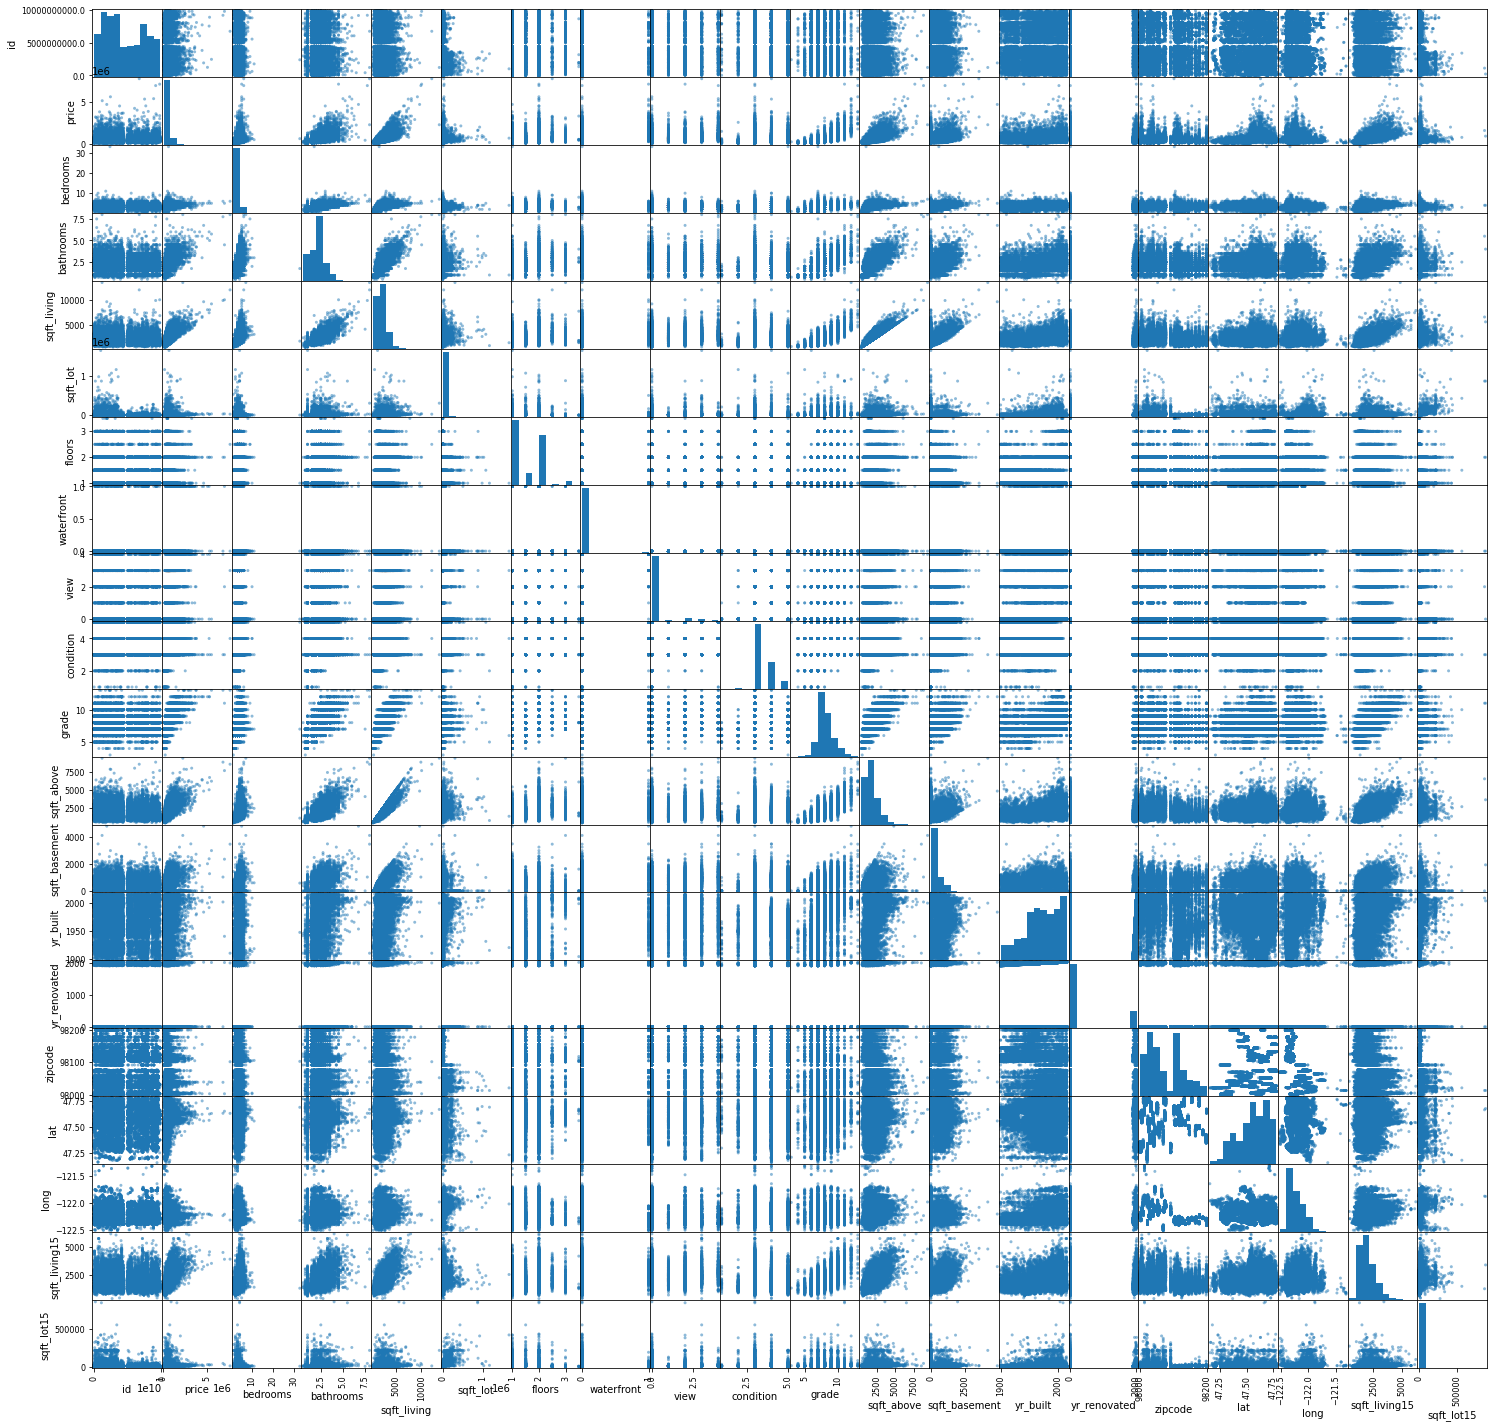

In [11]:
#Scatter plot of the data
pd.plotting.scatter_matrix(data_k, figsize=(25,25));

Looking at our scatter matrix above, we can see interesting relationships in our data, but because the data is difficult to actually look at.

In [12]:
#checking the mean and standard deviation
price_mean = data_k['price'].mean()
price_std = data_k['price'].std()
price_mean, price_std

(540296.5735055795, 367368.1401013945)

In [13]:
#checking the average price of the house according to the year built
avg_price_yr=data_k.groupby(['yr_built']).price.mean()
avg_price_yr.sort_index()

yr_built
1900    581536.632184
1901    557108.344828
1902    673192.592593
1903    480958.195652
1904    583867.755556
            ...      
2011    544648.384615
2012    527436.982353
2013    678599.582090
2014    683792.685152
2015    759970.947368
Name: price, Length: 116, dtype: float64

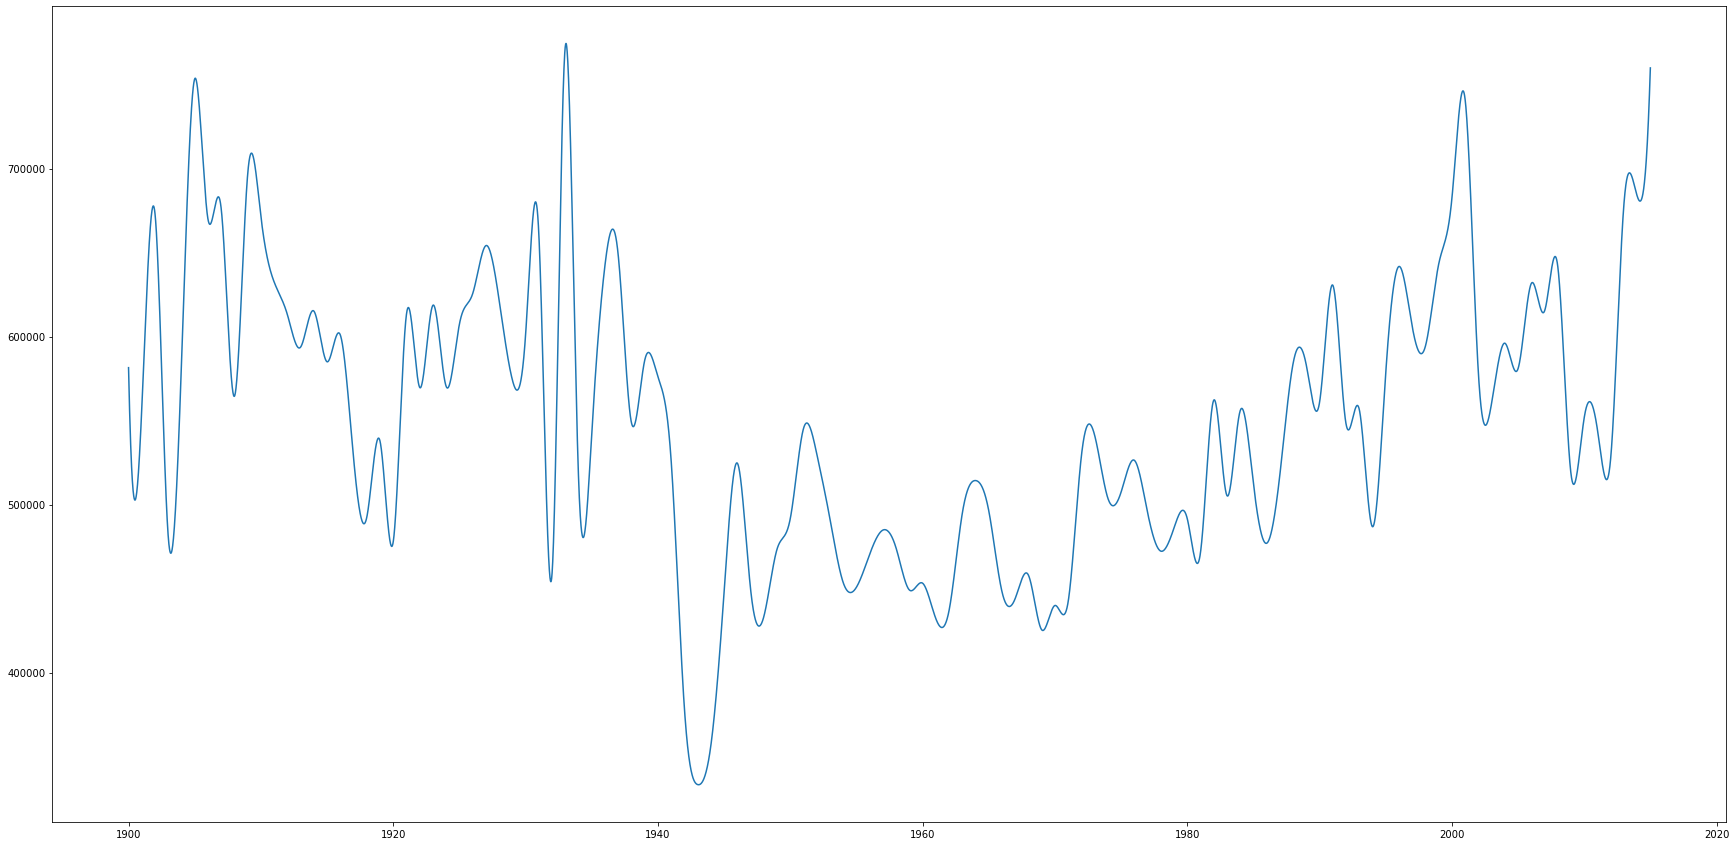

In [14]:
#Data visulisation according to the price and year built
T=avg_price_yr.index
X=np.linspace(T.min(),T.max(),10000)
Y=avg_price_yr.values
spl=interpolate.make_interp_spline(T,Y,3)
test=spl(X)

fig,ax=plt.subplots(figsize=(30,15))
ax.plot(X,test)
# Interpolate to make more smooth(Interpolation in Python is a technique used to estimate unknown data points between two known data points. Interpolation is mostly used to impute missing values in the dataframe or series while preprocessing data.)


In [299]:
Answer:This figure shows that the year built doesnot affect the price and it also showsthere no normal distribution with the price and year built

SyntaxError: invalid syntax (<ipython-input-299-622f73eb687e>, line 1)

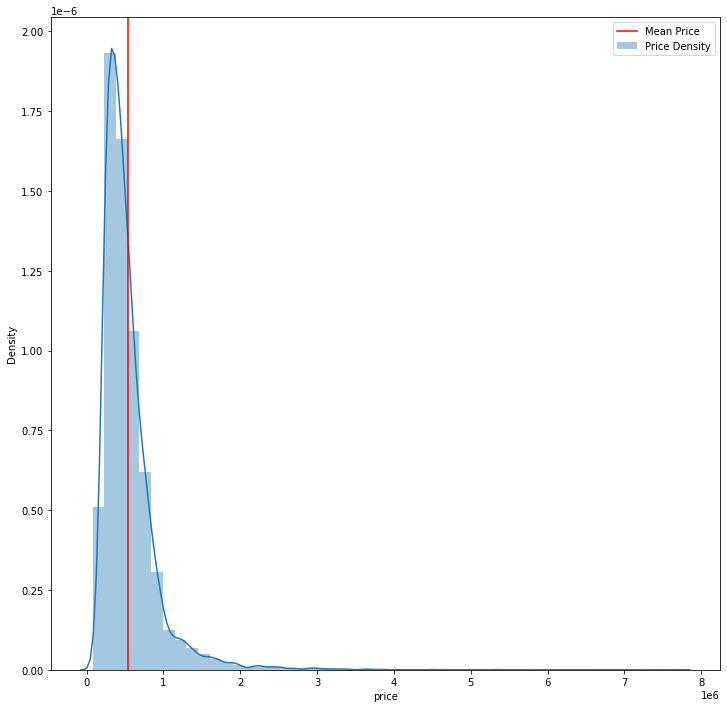

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.distplot(data_k['price'], label='Price Density')
plt.axvline(price_mean, color='red', label='Mean Price')
plt.legend()

In [300]:
data_k.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.007119,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.051588,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,-0.002292,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.012400,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.016479,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,-0.006170,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,-0.001467,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.031756,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.044831,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.029692,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


<AxesSubplot:>

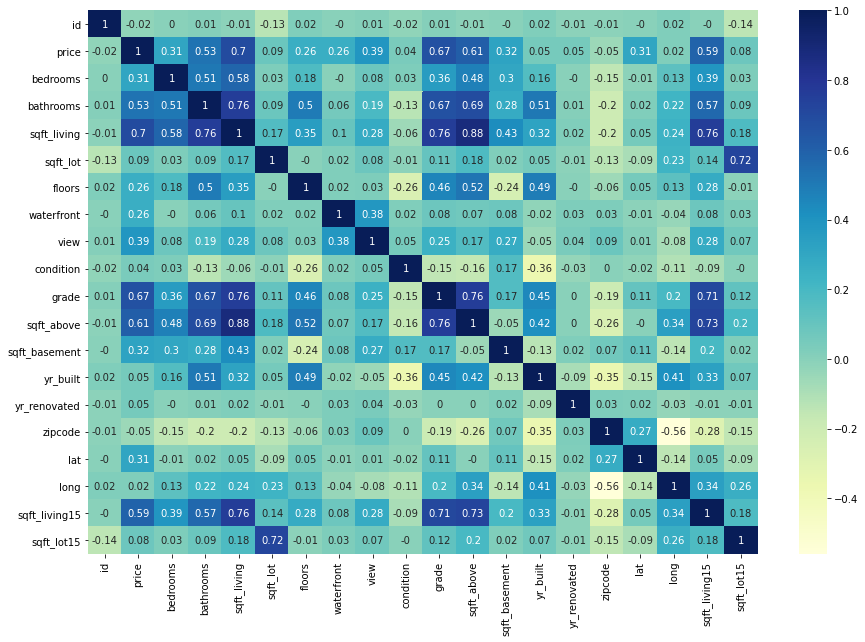

In [16]:
#checking the correlation using data visualization
plt.figure(figsize=(15,10))
sns.heatmap(data_k.corr().round(2),annot=True, cmap=('YlGnBu'))

But, even our heatmap is difficult to read. We are going to use a pairwise correlation in order to determine which values are highly correlated with our target (price) by using any value greater than 0.70.

##### Checking outliers

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

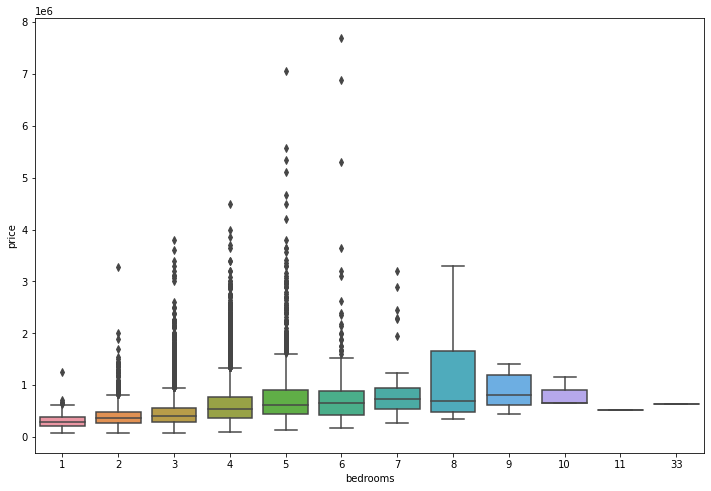

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=data_k)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

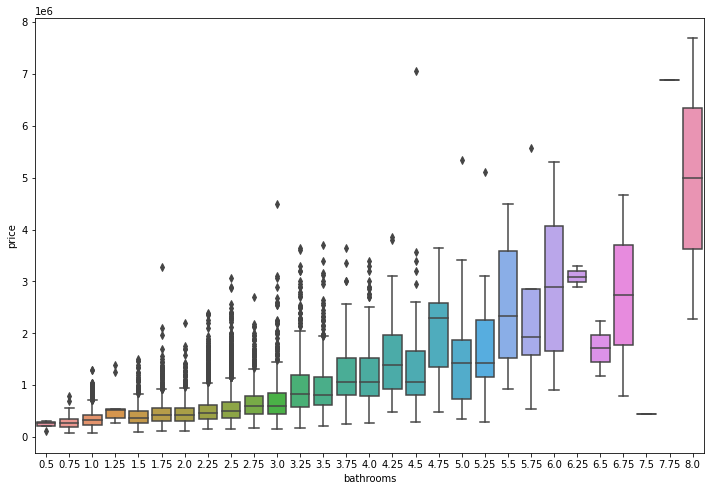

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bathrooms',y='price',data=data_k)

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

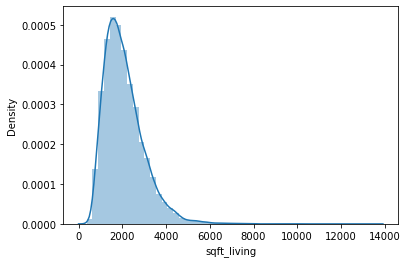

In [19]:
sns.distplot(data_k.sqft_living)

<AxesSubplot:xlabel='floors', ylabel='price'>

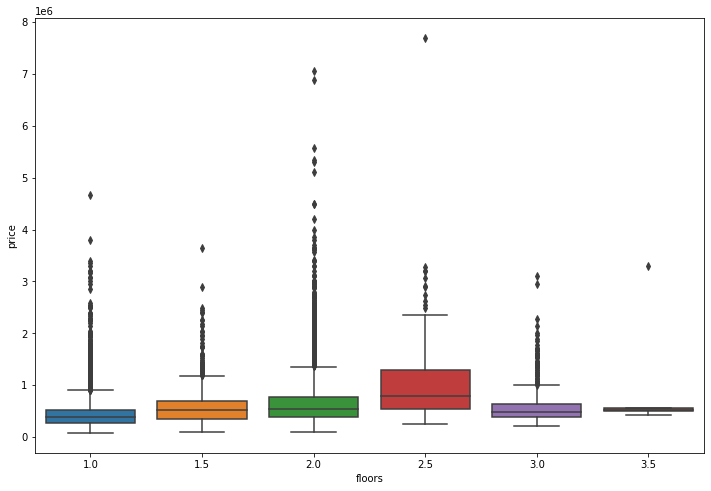

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='floors',y='price',data=data_k)

Text(0.5, 1.0, 'House Condition and price')

findfont: Font family ['silom'] not found. Falling back to DejaVu Sans.


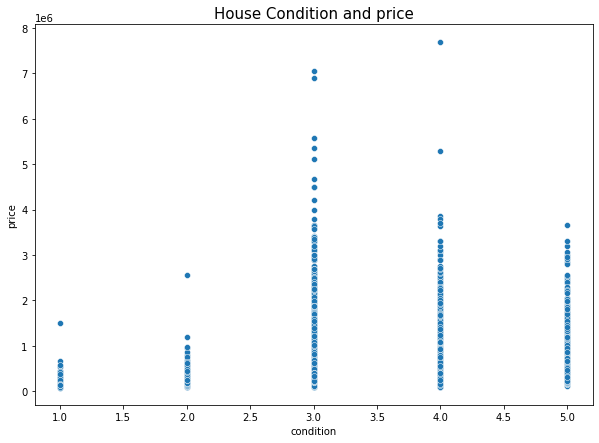

In [21]:
plt.figure(figsize=(10,7))
sns.scatterplot(data_k['condition'], data_k['price'])
plt.title('House Condition and price', fontsize=15, fontname='silom')

The house condition is not affecting the price according to this figure

Text(0.5, 1.0, 'House Condition and Grade')

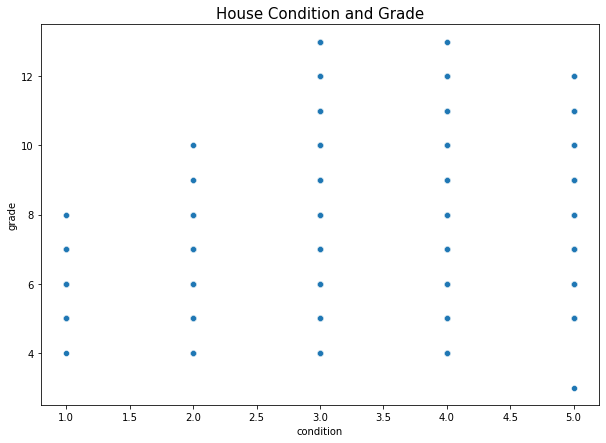

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(data_k['condition'], data_k['grade'])
plt.title('House Condition and Grade', fontsize=15, fontname='silom')

In [ ]:
In this figure the condition of the house doenot affect the grade

<AxesSubplot:xlabel='grade', ylabel='price'>

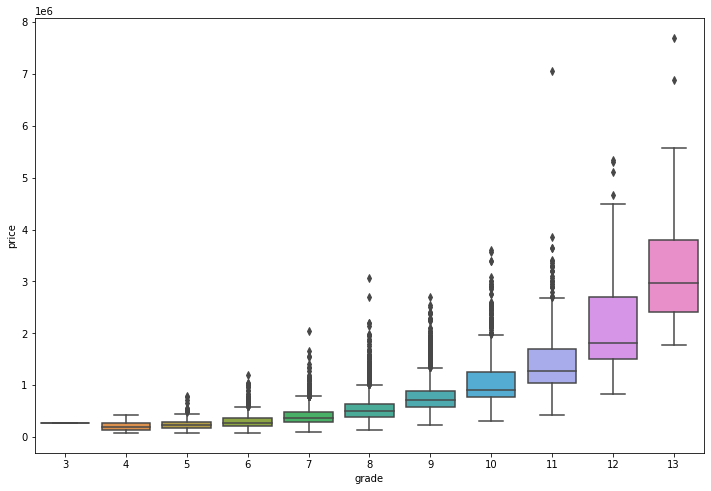

In [287]:
plt.figure(figsize=(12,8))
sns.boxplot(x='grade',y='price',data=data_k)

In this figure the house price increase with increase in grade 

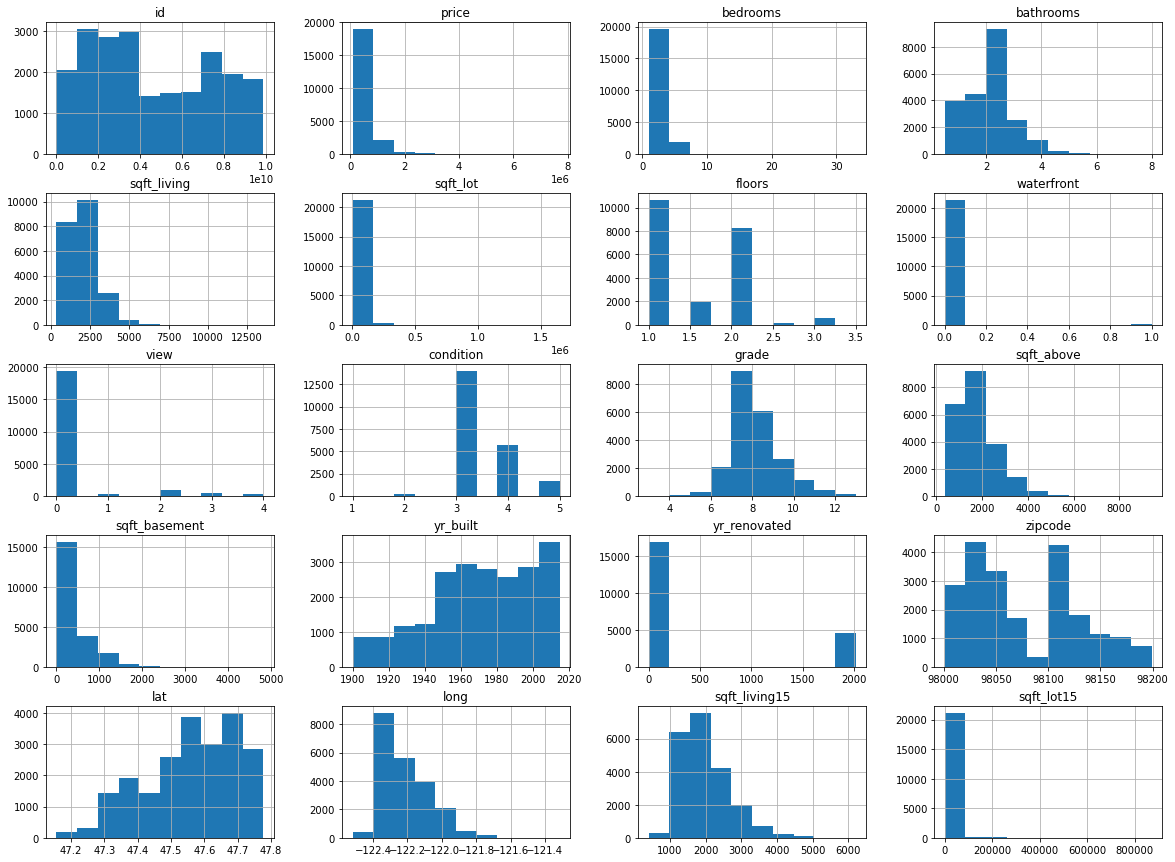

In [23]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
data_k.hist(ax = ax);

In [ ]:
We can see from the box plots and histograms above that many of our continuos data have outliers that need to be removed. 

In [303]:
outcome = 'price'
x_cols = data_k.drop('price',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_k).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     131.8
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:07:35   Log-Likelihood:            -2.9412e+05
No. Observations:               21597   AIC:                         5.890e+05
Df Residuals:                   21207   BIC:                         5.921e+05
Df Model:                         389                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 7.718e+06   2.94e+06      2.627      0.009    1.96e+06    1.35e+07
date[T.Timestamp('2014-05-03 00:00:00')]  1.779e+05   1.03e+05      1.723      0.085   -2.45e+04     3.8e+05
date[T.Timestamp('2014-05-04 00:00:00')] -6.527e+04    9.3e+04     -0.702      0.483   -2.48e+05    1.17e+05
date[T.Timestamp('2014-05-05 00:00:00')]  1.637e+04   3.29e+04      0.498      0.618    -4.8e+04    8.08e+04
date[T.Timestamp('2014-05-06 00:00:00')]  2686.5740    3.3e+04      0.082      0.935   -6.19e+04    6.73e+04
date[T.Timestamp('2014-05-07 00:00:00')]  1.594e+04   3.21e+04      0.496      0.620   -4.71e+04     7.9e+04
date[T.Timestamp('2014-05-08 00:00:00')]  4.997e+04   3.31e+04      1.508      0.132    -1.5e+04    1.15e+05
date[T.Timestamp('2014-05-09 00:00:00')] -1.463e+04   3.31e+04     -0.442      0.659   -7.96e+04    5.03e+04
date[T.Timestamp('2014-05-10 00:00:00')]  3.818e+04    9.3e+04      0.410      0.681   -1.44e+05    2.21e+05
date[T.Timestamp('2014-05-11 00:00:00')]  5.684e+04   1.44e+05      0.395      0.693   -2.25e+05    3.39e+05
date[T.Timestamp('2014-05-12 00:00:00')]  2.229e+04   3.32e+04      0.671      0.502   -4.28e+04    8.74e+04
date[T.Timestamp('2014-05-13 00:00:00')]  4.606e+04   3.27e+04      1.409      0.159    -1.8e+04     1.1e+05
date[T.Timestamp('2014-05-14 00:00:00')]  8176.0623   3.31e+04      0.247      0.805   -5.68e+04    7.31e+04
date[T.Timestamp('2014-05-15 00:00:00')]  8102.5443    3.3e+04      0.245      0.806   -5.67e+04    7.29e+04
date[T.Timestamp('2014-05-16 00:00:00')]  1719.3731   3.39e+04      0.051      0.960   -6.48e+04    6.82e+04
date[T.Timestamp('2014-05-17 00:00:00')]  8.116e+04   2.02e+05      0.402      0.688   -3.15e+05    4.77e+05
date[T.Timestamp('2014-05-18 00:00:00')]  1.637e+04   7.97e+04      0.205      0.837    -1.4e+05    1.73e+05
date[T.Timestamp('2014-05-19 00:00:00')]  1.375e+04    3.3e+04      0.417      0.677   -5.08e+04    7.83e+04
date[T.Timestamp('2014-05-20 00:00:00')]  1.505e+04   3.08e+04      0.489      0.625   -4.53e+04    7.54e+04
date[T.Timestamp('2014-05-21 00:00:00')]  1.085e+04   3.21e+04      0.338      0.735    -5.2e+04    7.37e+04
date[T.Timestamp('2014-05-22 00:00:00')]  1.213e+04   3.23e+04      0.376      0.707   -5.12e+04    7.54e+04
date[T.Timestamp('2014-05-23 00:00:00')]  1.411e+04   3.29e+04      0.429      0.668   -5.03e+04    7.85e+04
date[T.Timestamp('2014-05-24 00:00:00')]  5.735e+04   6.53e+04      0.878      0.380   -7.06e+04    1.85e+05
date[T.Timestamp('2014-05-25 00:00:00')] -8.984e+04    9.3e+04     -0.966      0.334   -2.72e+05    9.25e+04
date[T.Timestamp('2014-05-26 00:00:00')] -1.866e+04    7.5e+04     -0.249      0.804   -1.66e+05    1.28e+05
date[T.Timestamp('2014-05-27 00

In [307]:
new_data= data_k.drop(['id','view','date',], axis=1)
new_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [309]:
new_data['waterfront'].fillna(0, inplace=True)


In [310]:
#Now, let's place our continuous and categorical data into a separate features
cont_data = new_data[['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'lat', 'long','sqft_above','yr_renovated', 'sqft_living15','sqft_lot15'
]]
cat_data = new_data[['bedrooms','bathrooms','floors','waterfront', 'condition', 'grade', 'zipcode']]

##### Remove outliners

In [311]:
count = 0
bath_outliers = []
mean = np.mean(cat_data['bathrooms'])
max_distance = np.std(cat_data['bathrooms']) * 3 

for idx, row in cat_data['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        cat_data.drop(idx, inplace=True)
count

187

In [312]:
count = 0
bed_outliers = []
mean = np.mean(cat_data['bedrooms'])
max_distance = np.std(cat_data['bedrooms']) * 3 

for idx, row in cat_data['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        cat_data.drop(idx,inplace=True)
count

47

In [313]:
cont_data.shape

(21597, 11)

In [314]:
z_cont=np.abs(stats.zscore(cont_data))

In [315]:
cont_data1 = cont_data[(z_cont < 3).all(axis=1)]

In [316]:
cont_data1.shape

(20135, 11)

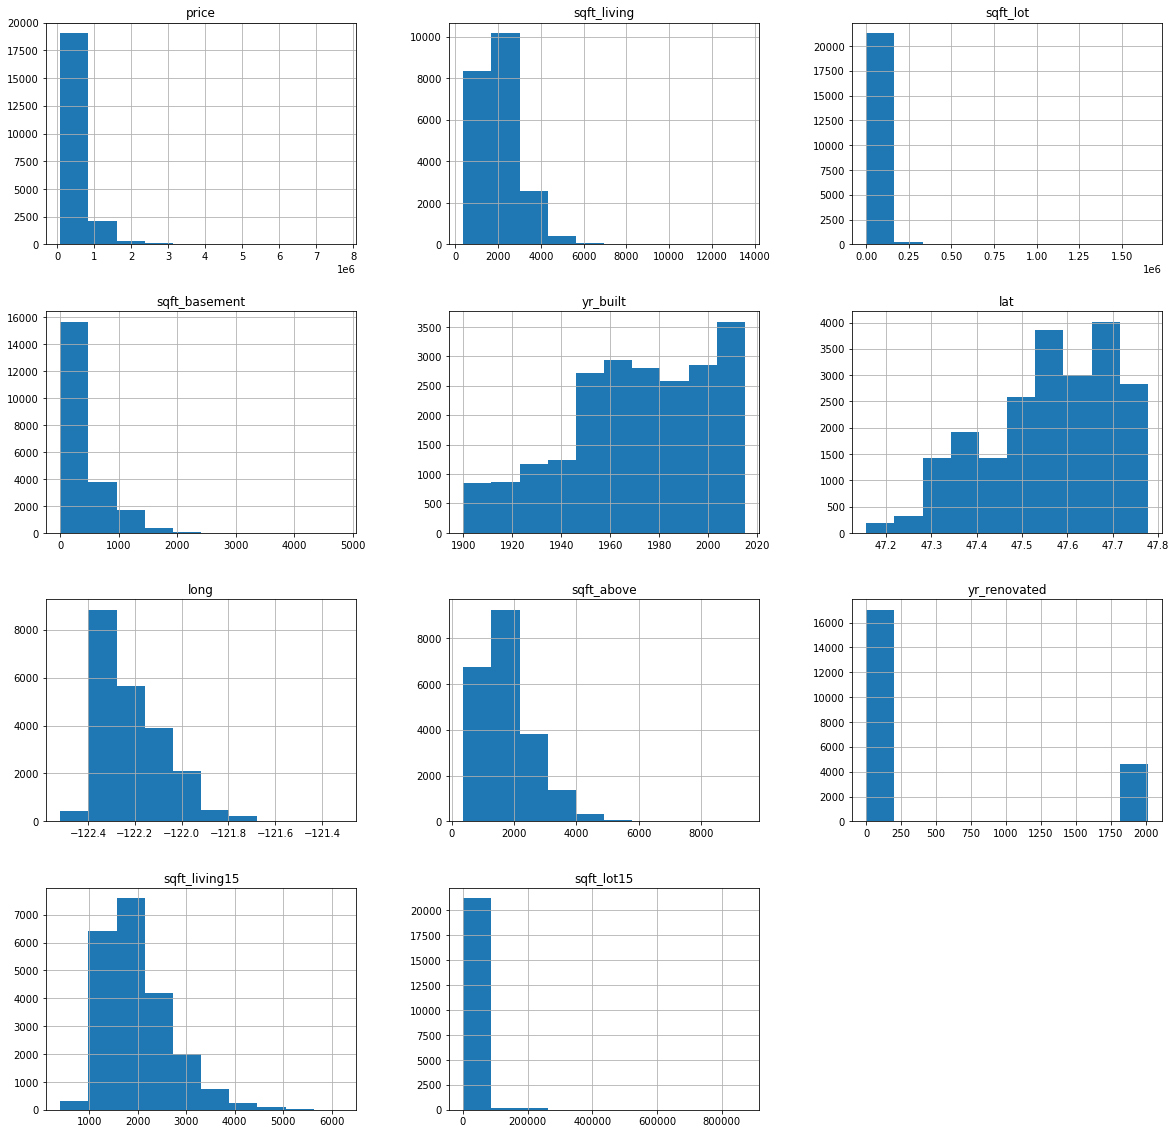

In [317]:
# Analysising data with histogram
cont_data.hist(figsize=(20,20));


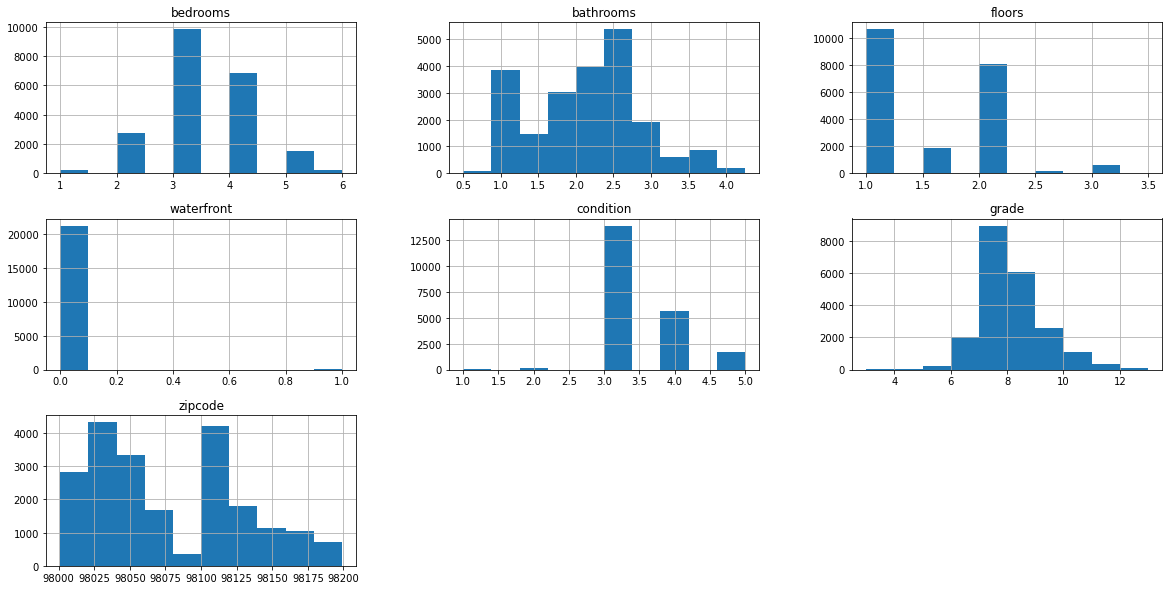

In [107]:
# Analysising data with histogram
cat_data.hist(figsize=(20,10));

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

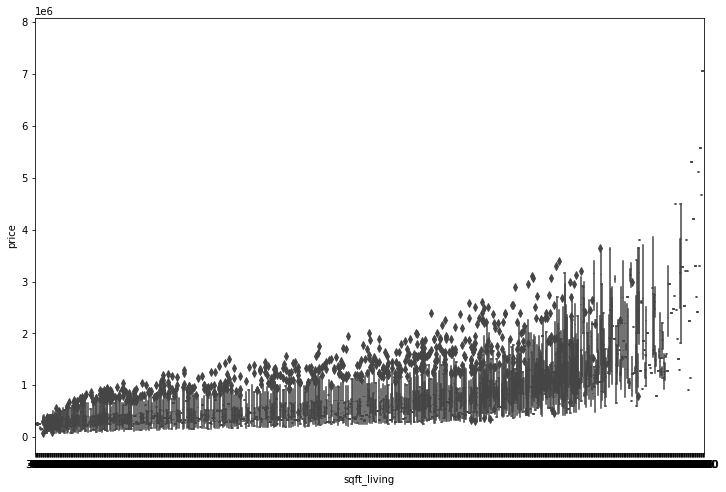

In [289]:
plt.figure(figsize=(12,8))
sns.boxplot(x='sqft_living',y='price',data=cont_data)

In [318]:
#Let's make a continuous data feature and a feature for our target variable
target = cont_data['price']
cont_feat = cont_data.drop('price', axis=1)

In [319]:
cont_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    21597 non-null  int64  
 1   sqft_lot       21597 non-null  int64  
 2   sqft_basement  21597 non-null  float64
 3   yr_built       21597 non-null  int64  
 4   lat            21597 non-null  float64
 5   long           21597 non-null  float64
 6   sqft_above     21597 non-null  int64  
 7   yr_renovated   21597 non-null  float64
 8   sqft_living15  21597 non-null  int64  
 9   sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [320]:
target

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [321]:
dummy_1= pd.get_dummies(data=cat_data, columns=['bedrooms'],prefix='bed', drop_first=True)
dummy_2= pd.get_dummies(data=cat_data, columns=['condition'],prefix='condi', drop_first=True)
dummy_3= pd.get_dummies(data=cat_data, columns=['grade'],prefix='grd', drop_first=True)
dummy_4= pd.get_dummies(data=cat_data, columns=['zipcode'],prefix='zip_c', drop_first=True)
#dummy_5= pd.get_dummies(data=cat_data, columns=['waterfront'],prefix='wf', drop_first=True)
#dummy_6= pd.get_dummies(data=cat_data, columns=['floors'],prefix='flr', drop_first=True)
#dummy_7= pd.get_dummies(data=cat_data, columns=['bathrooms'],prefix='bath', drop_first=True)


In [322]:
#Let's create one feature containing all of our dummies
cat_dummies = pd.concat([dummy_1,dummy_2,dummy_3,dummy_4],axis=1)
cat_dummies

,bathrooms,floors,waterfront,condition,grade,zipcode,bed_2,bed_3,bed_4,bed_5,...,zip_c_98146,zip_c_98148,zip_c_98155,zip_c_98166,zip_c_98168,zip_c_98177,zip_c_98178,zip_c_98188,zip_c_98198,zip_c_98199
0,1.00,1.0,0.0,3,7,98178,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2.25,2.0,0.0,3,7,98125,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.00,1.0,0.0,3,6,98028,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.00,1.0,0.0,5,7,98136,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.00,1.0,0.0,3,8,98074,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.50,3.0,0.0,3,8,98103,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,2.50,2.0,0.0,3,8,98146,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
21594,0.75,2.0,0.0,3,7,98144,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,2.50,2.0,0.0,3,8,98027,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [323]:
d1= pd.concat([target,cont_feat,cat_dummies], axis=1)
d1.dropna(how='any',inplace=True)

In [324]:
outcome = 'price'
x_cols = d1.drop('price',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=d1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     969.6
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:17:30   Log-Likelihood:            -2.8333e+05
No. Observations:               21363   AIC:                         5.669e+05
Df Residuals:                   21261   BIC:                         5.677e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.11e+04    827.588    -13.414      0.000   -1.27e+04   -9478.875
sqft_living      92.5485     13.153      7.036      0.000      66.768     118.329
sqft_lot          0.2927      0.034      8.699      0.000       0.227       0.359
sqft_basement    24.3504     13.028      1.869      0.062      -1.185      49.886
yr_built       -645.8462     55.246    -11.690      0.000    -754.132    -537.560
lat            1.414e+05   5.54e+04      2.553      0.011    3.28e+04     2.5e+05
long          -1.861e+05   3.98e+04     -4.673      0.000   -2.64e+05   -1.08e+05
sqft_above       53.1626     13.180      4.034      0.000      27.329      78.996
yr_renovated      6.9696      1.200      5.809      0.000       4.618       9.321
sqft_living15    38.7259      2.565     15.098      0.000      33.699      43.753
sqft_lot15       -0.0845      0.054     -1.568      0.117      -0.190       0.021
bathrooms[0]   6819.1897    597.974     11.404      0.000    5647.115    7991.265
bathrooms[1]   6819.1897    597.974     11.404      0.000    5647.115    7991.265
bathrooms[2]   6819.1897    597.974     11.404      0.000    5647.115    7991.265
bathrooms[3]   6819.1897    597.974     11.404      0.000    5647.115    7991.265
floors[0]     -5276.1961    703.622     -7.499      0.000   -6655.348   -3897.044
floors[1]     -5276.1961    703.622     -7.499      0.000   -6655.348   -3897.044
floors[2]     -5276.1961    703.622     -7.499      0.000   -6655.348   -3897.044
floors[3]     -5276.1961    703.622     -7.499      0.000   -6655.348   -3897.044
waterfront[0]  1.824e+05   3149.220     57.905      0.000    1.76e+05    1.89e+05
waterfront[1]  1.824e+05   3149.220     57.905      0.000    1.76e+05    1.89e+05
waterfront[2]  1.824e+05   3149.220     57.905      0.000    1.76e+05    1.89e+05
waterfront[3]  1.824e+05   3149.220     57.905      0.000    1.76e+05    1.89e+05
condition[0]   1.374e+04   2884.312      4.762      0.000    8082.786    1.94e+04
condition[1]   1.374e+04   2884.312      4.762      0.000    8082.786    1.94e+04
condition[2]   1.374e+04   2884.312      4.762      0.000    8082.786    1.94e+04
grade[0]       1.729e+04   6704.427      2.579      0.010    4146.463    3.04e+04
grade[1]       1.729e+04   6704.427      2.579      0.010    4146.463    3.04e+04
grade[2]       1.729e+04   6704.427      2.579      0.010    4146.463    3.04e+04
zipcode[0]      -96.6712     18.290     -5.286      0.000    -132.520     -60.822
zipcode[1]      -96.6712     18.290     -5.286      0.000    -132.520     -60.822
zipcode[2]      -96.6712     18.290     -5.286      0.000    -132.520     -60.822
bed_2          1.102e+04   7955.804      1.385      0.166   -4573.723    2.66e+04
bed_3          1.912e+04   5269.881      3.628      0.000    8791.674    2.95e+04
bed_4          6408.2021   3608.259      1.776   

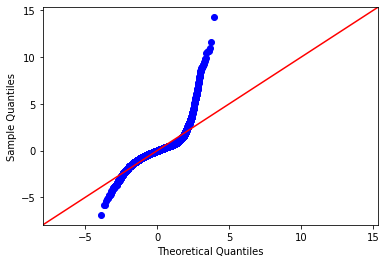

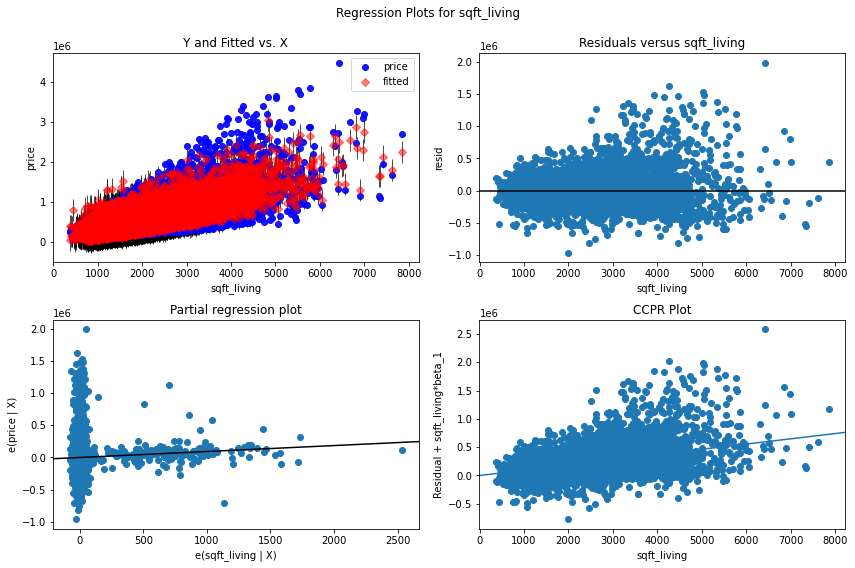

In [325]:
# Q-Q plot and Regression plot
model=smf.ols(formula,data=d1).fit()
fig = sm.graphics.qqplot(model.resid, line='45',fit=True);
#fig.savefig('Basic_model_qqplot')
sm.graphics.plot_regress_exog(model, 'sqft_living', fig=plt.figure(figsize=(12,8)));

Conclusion:

The base model shows that sqft_living(independent variable) has high correlation with price(dependent variable). In Basic linear model high R-squared value (0.82) and low P-value(0) shows there is a relationship between variables. Q-Q data plot is not normally distributed and scatter plots are very homoscedastic.

# Iteration1

### Log transformation

In [326]:
n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21363 non-null  float64
 1   bathrooms    21363 non-null  float64
 2   floors       21363 non-null  float64
 3   waterfront   21363 non-null  float64
 4   condition    21363 non-null  float64
 5   grade        21363 non-null  float64
 6   zipcode      21363 non-null  float64
 7   price        21597 non-null  float64
 8   sqft_living  21597 non-null  int64  
 9   sqft_lot     21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 2.9 MB


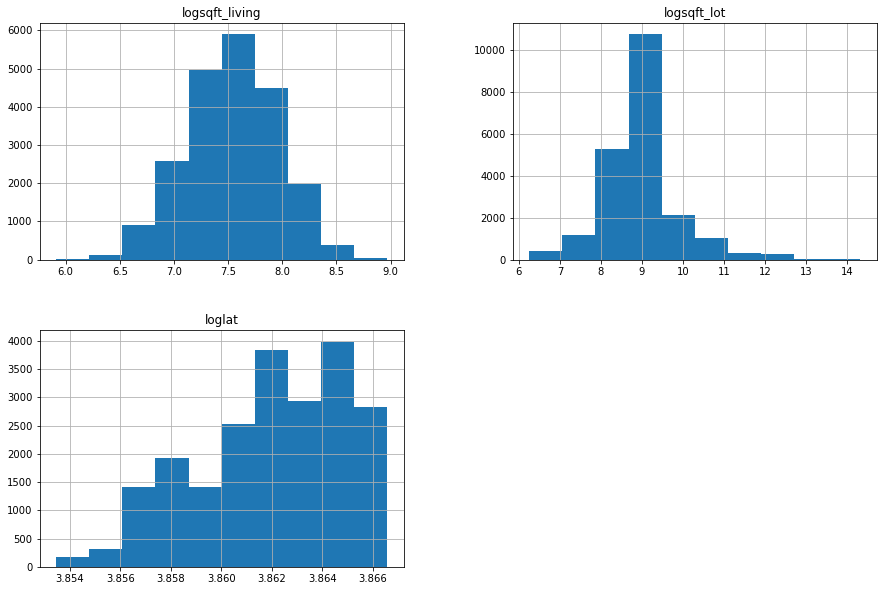

In [346]:
data_log = pd.DataFrame([])
data_log['logsqft_living'] = np.log(d1['sqft_living'])
data_log['logsqft_lot'] = np.log(d1['sqft_lot'])
#data_log['logsqft_basement'] = np.log(d1['sqft_basement'])
data_log['loglat'] = np.log(d1['lat'])
#data_log['loglong'] = np.log(d1['long'])
data_log.hist(figsize  = [15,10 ]);

In [347]:

pp = d1['price']
logliving = np.log(d1['sqft_living'])
loglot = np.log(d1['sqft_lot'])
loglat = np.log(d1['lat'])
#loglong = np.log(d1['long'])

scaled_pp = (pp-min(pp))/(max(pp)-min(pp))	
scaled_lot = (loglot-np.mean(loglot))/np.sqrt(np.var(loglot))
scaled_lat = (loglat-np.mean(loglat))/(max(loglat)-min(loglat))
scaled_living=(logliving-np.mean(logliving))/np.sqrt(np.var(logliving))

data_fin = pd.DataFrame([])
data_fin['pp'] = scaled_pp
data_fin['lot'] = scaled_lot
data_fin['lat'] = scaled_lat
data_fin['living'] = scaled_living

In [348]:
data_fin

,pp,lot,lat,living
0,0.032616,-0.382321,-0.077514,-1.126726
1,0.104261,-0.105936,0.258885,0.746830
2,0.023119,0.253334,0.285919,-2.154206
3,0.119220,-0.518395,-0.062088,0.094637
4,0.097915,0.015972,0.091993,-0.276397
...,...,...,...,...
21592,0.063917,-2.173235,0.224160,-0.501510
21593,0.072983,-0.350656,-0.078317,0.490108
21594,0.073459,-1.976166,0.056069,-1.477448
21595,0.072983,-1.341154,-0.040081,-0.393833


In [349]:
outcome = 'pp'
x_cols = data_fin.drop('pp',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pp   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     6292.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:23:01   Log-Likelihood:                 31874.
No. Observations:               21363   AIC:                        -6.374e+04
Df Residuals:                   21359   BIC:                        -6.371e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1023      0.000    274.582      0.000       0.102       0.103
lot            0.0003      0.000      0.872      0.383      -0.000       0.001
lat            0.1044      0.002     61.560      0.000       0.101       0.108
living         0.0447      0.000    113.442      0.000       0.044       0.045
==============================================================================
Omnibus:                    15259.012   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           396659.314
Skew:                           3.137   Prob(JB):                         0.00
Kurtosis:                      23.156   Cond. No.                         5.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
r_lot = data_fin.drop('lot',axis=1)
r_lot

,pp,lat,living
0,0.032616,-0.077514,-1.126726
1,0.104261,0.258885,0.746830
2,0.023119,0.285919,-2.154206
3,0.119220,-0.062088,0.094637
4,0.097915,0.091993,-0.276397
...,...,...,...
21592,0.063917,0.224160,-0.501510
21593,0.072983,-0.078317,0.490108
21594,0.073459,0.056069,-1.477448
21595,0.072983,-0.040081,-0.393833


In [351]:
outcome = 'pp'
x_cols = r_lot.drop('pp',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=r_lot).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pp   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     9437.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:26:31   Log-Likelihood:                 31873.
No. Observations:               21363   AIC:                        -6.374e+04
Df Residuals:                   21360   BIC:                        -6.372e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1023      0.000    274.584      0.000       0.102       0.103
lat            0.1041      0.002     62.339      0.000       0.101       0.107
living         0.0448      0.000    120.260      0.000       0.044       0.046
==============================================================================
Omnibus:                    15266.436   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           397146.372
Skew:                           3.139   Prob(JB):                         0.00
Kurtosis:                      23.168   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

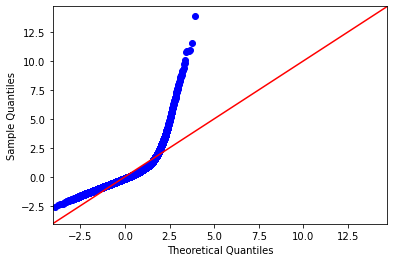

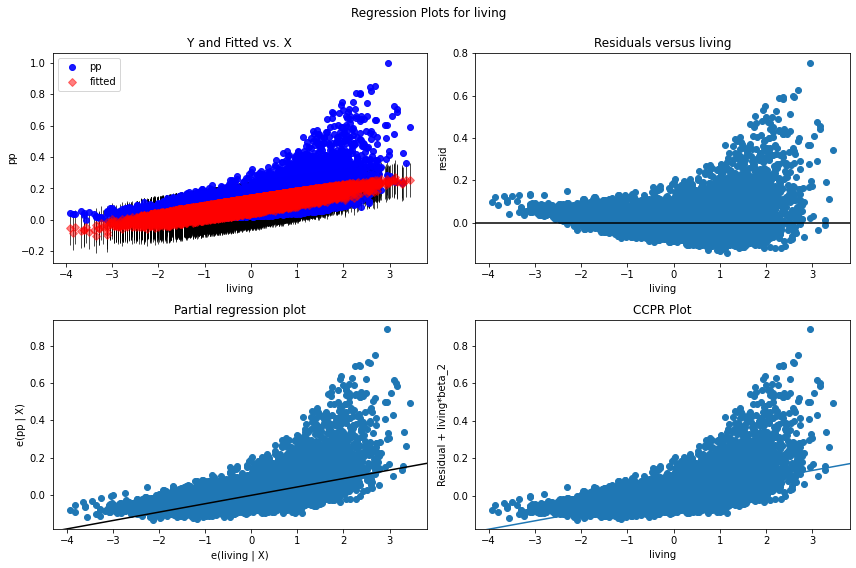

In [353]:
# Q-Q plot and Regression plot
model=smf.ols(formula,data=r_lot).fit()
fig = sm.graphics.qqplot(model.resid, line='45',fit=True);
#fig.savefig('Basic_model_qqplot')
sm.graphics.plot_regress_exog(model, 'living', fig=plt.figure(figsize=(12,8)));

Conclusion

The Iteration 1 shows that sqft_living(independent variable) has high correlation with price(dependent variable). In this model high R-squared value (0.40) and low P-value(0) shows there is a relationship between variables. Q-Q data plot is not normally distributed and scatter plots are very heteroscedastic.

In [354]:
data_pred = data_fin.iloc[:,0:15]
data_pred

,pp,lot,lat,living
0,0.032616,-0.382321,-0.077514,-1.126726
1,0.104261,-0.105936,0.258885,0.746830
2,0.023119,0.253334,0.285919,-2.154206
3,0.119220,-0.518395,-0.062088,0.094637
4,0.097915,0.015972,0.091993,-0.276397
...,...,...,...,...
21592,0.063917,-2.173235,0.224160,-0.501510
21593,0.072983,-0.350656,-0.078317,0.490108
21594,0.073459,-1.976166,0.056069,-1.477448
21595,0.072983,-1.341154,-0.040081,-0.393833


In [355]:
data_pred.corr()

,pp,lot,lat,living
pp,1.000000,0.146261,0.331163,0.610355
lot,0.146261,1.000000,-0.152340,0.316015
lat,0.331163,-0.152340,1.000000,0.033681
living,0.610355,0.316015,0.033681,1.000000


In [356]:
abs(data_pred.corr()) > 0.5

,pp,lot,lat,living
pp,True,False,False,True
lot,False,True,False,False
lat,False,False,True,False
living,True,False,False,True


<AxesSubplot:>

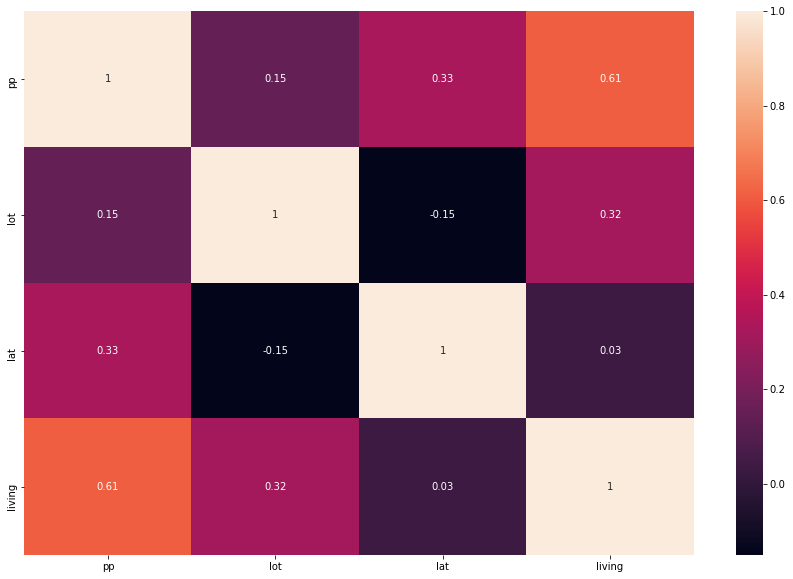

In [357]:
plt.figure(figsize=(15,10))
sns.heatmap(data_fin.corr().round(2),annot=True)

Conclusion:

The price and sqft living is 61% correlated and showing normal distribution.
The r2 and adjust r2 is 45%.
The probability is 0 in this case ,so it means not likely to be true or to happen.

# Iteration 2-Model evaluation

### Train-test split

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [336]:
X = cont_data.drop("price", axis=1)
y = cont_data["price"]


In [337]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [338]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [339]:
rootMeanSquareError = np.sqrt(meanSquareError).round(3)
rootMeanSquareError

228036.996

In [340]:
y_predict= lm.predict(X_train)


In [341]:
y_predict

array([765179.34565939, 288045.7561236 , 694204.53102167, ...,
       412681.85528234, 357586.28744134, 294053.1575178 ])

In [342]:
#model evaluation
print('R^2:',metrics.r2_score(y_train, y_predict))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_predict))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_predict))
print('MSE:',metrics.mean_squared_error(y_train, y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_predict)))

R^2: 0.6003850414249247
Adjusted R^2: 0.6001205008724455
MAE: 148100.68136135113
MSE: 54323037409.31655
RMSE: 233073.030205806


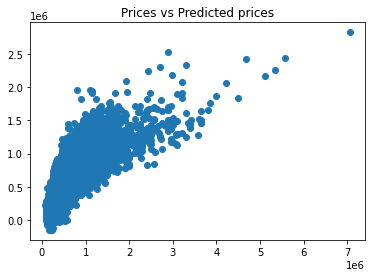

In [343]:
import matplotlib.pyplot as plt

plt.scatter(y_train,y_predict)
plt.title("Prices vs Predicted prices")
plt.show()

In [344]:
#linear regression for ols

y_test_pred=lm.predict(X_test)

acc_linreg=metrics.r2_score(y_test,y_test_pred)
print('R^2:',acc_linreg)
print('Adjusted R^2:', 1- (1-metrics.r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6166708534334627
Adjusted R^2: 0.6160782902141606
MAE: 143292.99656191687
MSE: 50835736790.27583
RMSE: 225467.81763763056


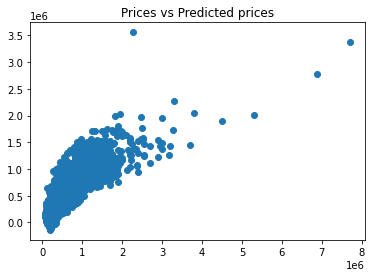

In [345]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_test_pred)
plt.title("Prices vs Predicted prices")
plt.show()

Conclusion:

This model shows that MSE value is higher for x-test than for x-train. R-squared value (0.60) for X-train and R-squared value (0.61) for X-test.
The scatter plot is showing non linear effect.